In [12]:
import matplotlib.pyplot as plt
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.operators.sampling.lhs import LatinHypercubeSampling
from pymoo.optimize import minimize
from pymoo.algorithms.moo.nsga3 import ReferenceDirectionSurvival
from pymoo.indicators.igd import IGD
from pymoode.algorithms import NSDER
from pymoode.algorithms import GDE3
from pymoode.survival import RankAndCrowding
from pymoo.util.ref_dirs import get_reference_directions

In [13]:
from pymoo.problems import get_problem
from pymoo.util.plotting import plot

problem = get_problem("dtlz2")
igd = IGD(pf=problem.pareto_front(), zero_to_one=True)

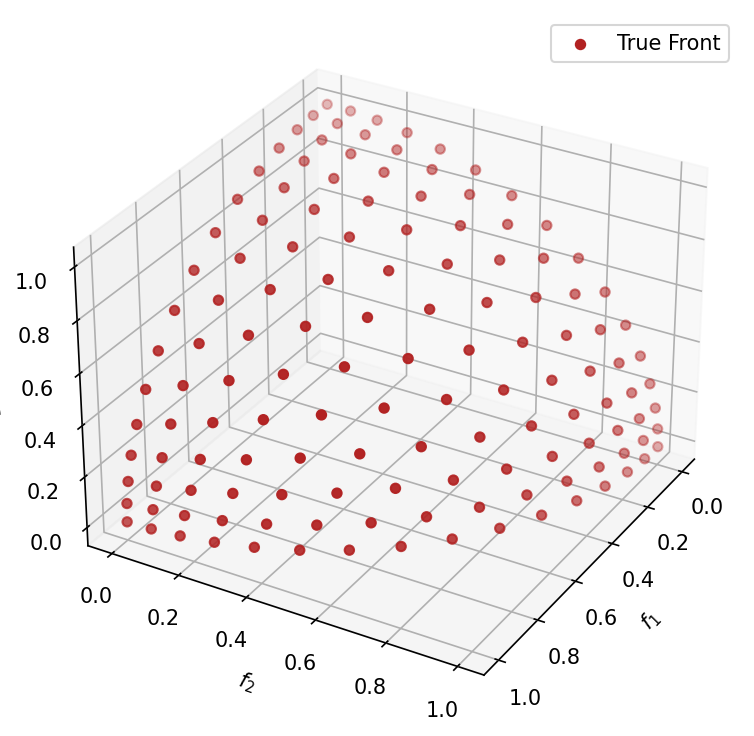

In [14]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=150, subplot_kw={'projection':'3d'})
ax.scatter(problem.pareto_front()[:, 0], problem.pareto_front()[:, 1], problem.pareto_front()[:, 2],
        color="firebrick", label="True Front", marker="o")

ax.view_init(elev=30, azim=30)

ax.set_xlabel("$f_1$")
ax.set_ylabel("$f_2$")
ax.set_zlabel("$f_3$")
ax.legend()
fig.tight_layout()

In [15]:
NGEN = 150
POPSIZE = 136
SEED = 5

In [16]:
problem.__dict__

{'k': 8,
 'n_var': 10,
 'n_obj': 3,
 'n_ieq_constr': 0,
 'n_eq_constr': 0,
 'data': {},
 'xl': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'xu': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'callback': None,
 'vars': None,
 'vtype': float,
 'elementwise': False,
 'elementwise_func': pymoo.core.problem.ElementwiseEvaluationFunction,
 'elementwise_runner': <pymoo.core.problem.LoopedElementwiseEvaluation at 0x181a3770c70>,
 'strict': True,
 'replace_nan_values_by': None,
 'exclude_from_serialization': None,
 'cache': {'pareto_front': array([[0.        , 0.        , 1.        ],
         [0.        , 0.07124705, 0.9974587 ],
         [0.        , 0.15205718, 0.9883717 ],
         [0.        , 0.24253563, 0.9701425 ],
         [0.        , 0.34174306, 0.93979342],
         [0.        , 0.4472136 , 0.89442719],
         [0.        , 0.5547002 , 0.83205029],
         [0.        , 0.65850461, 0.75257669],
         [0.        , 0.75257669, 0.65850461],
         [0.        , 0.8320502

In [17]:
ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=15)

In [18]:
ref_dirs.shape

(136, 3)

In [19]:
#This is the pure python implementation of mnn to compare runtime to cython
from pymoode.misc.mnn import calc_mnn

def calc_mnn_nds(F, n_remove: int=0):
    return calc_mnn(F, n_remove=n_remove, twonn=False)

In [20]:
%%time

gde3 = GDE3(pop_size=POPSIZE, variant="DE/rand/1/bin", CR=0.2, F=(0.0, 1.0), gamma=1e-4,
            survival=RankAndCrowding(crowding_func=calc_mnn_nds))

res_gde3 = minimize(problem,
                    gde3,
                    ('n_gen', NGEN),
                    seed=SEED,
                    save_history=True,
                    verbose=True)

n_gen  |  n_eval  | n_nds  |      igd      |       gd     
     1 |      136 |     42 |  0.4106041757 |  0.5141000106
     2 |      272 |     53 |  0.3812988528 |  0.4798609099
     3 |      408 |     69 |  0.3475242531 |  0.4716787521
     4 |      544 |     59 |  0.3011190881 |  0.4386219020
     5 |      680 |     63 |  0.2738379907 |  0.3850304458
     6 |      816 |     56 |  0.2402858027 |  0.3232554527
     7 |      952 |     70 |  0.2169989074 |  0.3032584959
     8 |     1088 |     71 |  0.1977286928 |  0.2619110098
     9 |     1224 |     73 |  0.1742783201 |  0.2296601705
    10 |     1360 |     85 |  0.1570276682 |  0.1927139211
    11 |     1496 |     95 |  0.1445854493 |  0.1630870755
    12 |     1632 |     89 |  0.1317369212 |  0.1404724745
    13 |     1768 |     95 |  0.1236229074 |  0.1352355570
    14 |     1904 |    102 |  0.1133879745 |  0.1217678675
    15 |     2040 |    114 |  0.1029964820 |  0.1098905309
    16 |     2176 |    129 |  0.0947080273 |  0.09947092

In [21]:
%%time

gde3 = GDE3(pop_size=POPSIZE, variant="DE/rand/1/bin", CR=0.2, F=(0.0, 1.0), gamma=1e-4,
            survival=RankAndCrowding(crowding_func="mnn"))

res_gde3 = minimize(problem,
                    gde3,
                    ('n_gen', NGEN),
                    seed=SEED,
                    save_history=True,
                    verbose=True)

n_gen  |  n_eval  | n_nds  |      igd      |       gd     
     1 |      136 |     42 |  0.4106041757 |  0.5141000106
     2 |      272 |     53 |  0.3812988528 |  0.4798609099
     3 |      408 |     69 |  0.3475242531 |  0.4716787521
     4 |      544 |     59 |  0.3011190881 |  0.4386219020
     5 |      680 |     63 |  0.2738379907 |  0.3850304458
     6 |      816 |     56 |  0.2402858027 |  0.3232554527
     7 |      952 |     70 |  0.2169989074 |  0.3032584959
     8 |     1088 |     71 |  0.1977286928 |  0.2619110098
     9 |     1224 |     73 |  0.1742783201 |  0.2296601705
    10 |     1360 |     85 |  0.1570276682 |  0.1927139211
    11 |     1496 |     95 |  0.1445854493 |  0.1630870755
    12 |     1632 |     89 |  0.1317369212 |  0.1404724745
    13 |     1768 |     95 |  0.1236229074 |  0.1352355570
    14 |     1904 |    102 |  0.1133879745 |  0.1217678675
    15 |     2040 |    114 |  0.1029964820 |  0.1098905309
    16 |     2176 |    129 |  0.0947080273 |  0.09947092

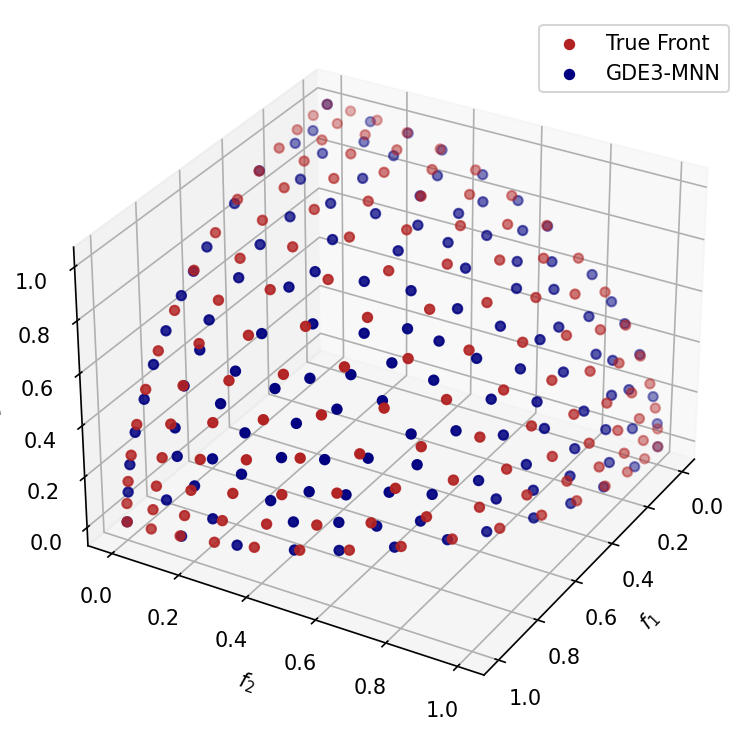

In [22]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=150, subplot_kw={'projection':'3d'})

ax.scatter(problem.pareto_front()[:, 0], problem.pareto_front()[:, 1], problem.pareto_front()[:, 2],
        color="firebrick", label="True Front", marker="o")

ax.scatter(res_gde3.F[:, 0], res_gde3.F[:, 1], res_gde3.F[:, 2],
        color="navy", label="GDE3-MNN", marker="o")

ax.view_init(elev=30, azim=30)

ax.set_xlabel("$f_1$")
ax.set_ylabel("$f_2$")
ax.set_zlabel("$f_3$")
ax.legend()
fig.tight_layout()

In [23]:
%%time

nsga3 = NSGA3(pop_size=POPSIZE, ref_dirs=ref_dirs)

res_nsga3 = minimize(problem,
                     nsga3,
                     ('n_gen', NGEN),
                     seed=SEED,
                     save_history=True,
                     verbose=True)

n_gen  |  n_eval  | n_nds  |      igd      |       gd     
     1 |      136 |     26 |  0.3822434678 |  0.4885883833
     2 |      272 |     35 |  0.3498900441 |  0.4803808498
     3 |      408 |     34 |  0.3132060510 |  0.3822500860
     4 |      544 |     41 |  0.2728754209 |  0.3422121664
     5 |      680 |     45 |  0.2297592961 |  0.2935134698
     6 |      816 |     53 |  0.2054927739 |  0.2533704744
     7 |      952 |     60 |  0.1839269526 |  0.2193731314
     8 |     1088 |     59 |  0.1670688836 |  0.1975271102
     9 |     1224 |     71 |  0.1480620781 |  0.1691644544
    10 |     1360 |     72 |  0.1356969233 |  0.1648436158
    11 |     1496 |     55 |  0.1255208177 |  0.1289902836
    12 |     1632 |     65 |  0.1145158252 |  0.1060180457
    13 |     1768 |     64 |  0.1118154709 |  0.1058813924
    14 |     1904 |     72 |  0.1031357349 |  0.1047963824
    15 |     2040 |     75 |  0.0942856231 |  0.0909422337
    16 |     2176 |     76 |  0.0924684452 |  0.08116981

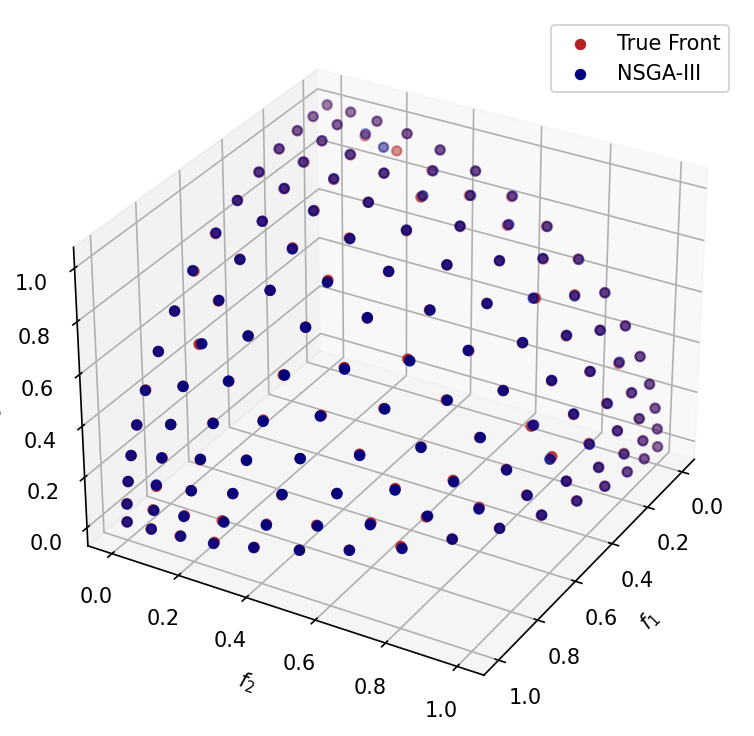

In [24]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=150, subplot_kw={'projection':'3d'})

ax.scatter(problem.pareto_front()[:, 0], problem.pareto_front()[:, 1], problem.pareto_front()[:, 2],
        color="firebrick", label="True Front", marker="o")

ax.scatter(res_nsga3.F[:, 0], res_nsga3.F[:, 1], res_nsga3.F[:, 2],
        color="navy", label="NSGA-III", marker="o")

ax.view_init(elev=30, azim=30)

ax.set_xlabel("$f_1$")
ax.set_ylabel("$f_2$")
ax.set_zlabel("$f_3$")
ax.legend()
fig.tight_layout()

In [25]:
%%time

nsder = NSDER(ref_dirs=ref_dirs, pop_size=POPSIZE, variant="DE/rand/1/bin", CR=0.5, F=(0.0, 1.0), gamma=1e-4)
    
res_nsder = minimize(problem,
                     nsder,
                     ('n_gen', NGEN),
                     seed=SEED,
                     save_history=True,
                     verbose=True)

n_gen  |  n_eval  | n_nds  |      igd      |       gd     
     1 |      136 |     27 |  0.4303183300 |  0.5157293057
     2 |      272 |     37 |  0.4020663408 |  0.4913012278
     3 |      408 |     45 |  0.3359056577 |  0.4486964303
     4 |      544 |     44 |  0.2998603832 |  0.3608481331
     5 |      680 |     44 |  0.2794928116 |  0.3671250599
     6 |      816 |     44 |  0.2380542188 |  0.3483233042
     7 |      952 |     56 |  0.2136696958 |  0.2914095698
     8 |     1088 |     49 |  0.1945096900 |  0.2387440593
     9 |     1224 |     55 |  0.1713649695 |  0.2006324656
    10 |     1360 |     56 |  0.1645028644 |  0.1941681614
    11 |     1496 |     56 |  0.1422299045 |  0.1716825011
    12 |     1632 |     57 |  0.1322350285 |  0.1555823824
    13 |     1768 |     58 |  0.1354036328 |  0.1318243003
    14 |     1904 |     56 |  0.1327770724 |  0.1189310247
    15 |     2040 |     75 |  0.1139692050 |  0.0999788713
    16 |     2176 |     80 |  0.1066190542 |  0.09745762

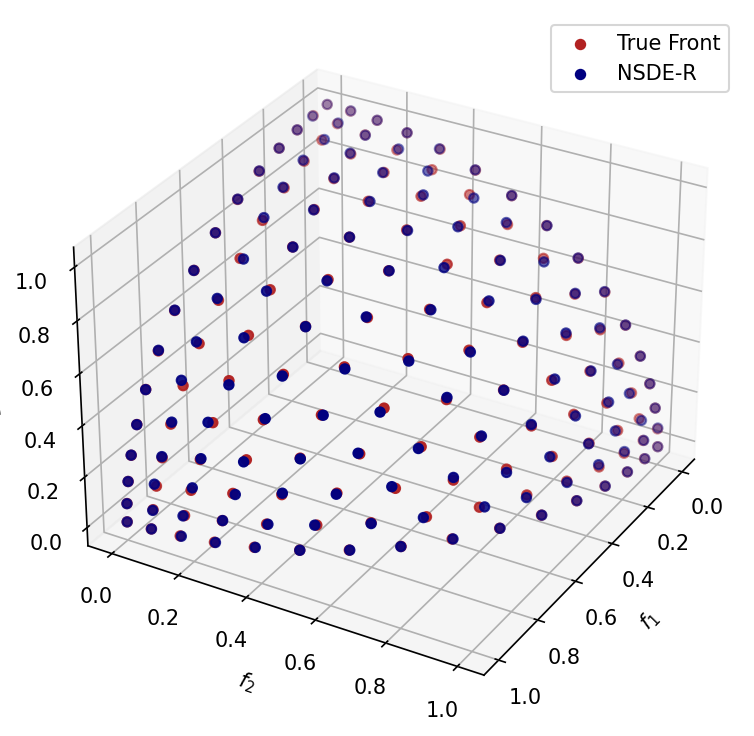

In [26]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=150, subplot_kw={'projection':'3d'})

ax.scatter(problem.pareto_front()[:, 0], problem.pareto_front()[:, 1], problem.pareto_front()[:, 2],
        color="firebrick", label="True Front", marker="o")

ax.scatter(res_nsder.F[:, 0], res_nsder.F[:, 1], res_nsder.F[:, 2],
        color="navy", label="NSDE-R", marker="o")

ax.view_init(elev=30, azim=30)

ax.set_xlabel("$f_1$")
ax.set_ylabel("$f_2$")
ax.set_zlabel("$f_3$")
ax.legend()
fig.tight_layout()

In [27]:
print("IGD of GDE3: ", igd.do(res_gde3.F))
print("IGD of NSDE-R: ", igd.do(res_nsder.F))

IGD of GDE3:  0.04011488503871424
IGD of NSDE-R:  0.004877000918527632
